# LIBRERIE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

# DATASET

In [19]:
airline_train = pd.read_csv("/Users/emanuele/Desktop/Machine Learning/ProgettoML/airline-train.csv")
airline_test = pd.read_csv("/Users/emanuele/Desktop/Machine Learning/ProgettoML/airline-test.csv")

print('airline_test:',airline_test.shape,'airline_train:',airline_train.shape)

data = airline_train #rinomino il dataset per l'analisi 
data.head()

airline_test: (25976, 25) airline_train: (103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [20]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1) #eliminiamo le prime due colonne che non contenevano informazioni

categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

data.columns = [c.replace(' ', '_') for c in data.columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer_Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type_of_Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight_Distance                    103904 non-null  int64   
 6   Inflight_wifi_service              103904 non-null  category
 7   Departure/Arrival_time_convenient  103904 non-null  category
 8   Ease_of_Online_booking             103904 non-null  category
 9   Gate_location                      103904 non-null  category
 10  Food_and_drink                     103904 non-null  category
 11  Online_boarding           

# ANALISI SUL DATASET DI TRAINING

In [67]:
data.describe()

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [68]:
data.describe(include = ['category'])

,Gender,Customer_Type,Type_of_Travel,Class,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [69]:
pie_satisfaction = px.pie(data.satisfaction.value_counts(), values='satisfaction', 
    names=["Neutral_or_dissatisfied", "Satisfied"], color_discrete_sequence= ['#b30000','#00b300'])
pie_satisfaction.show()

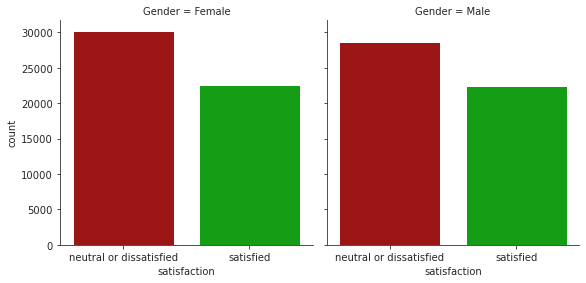

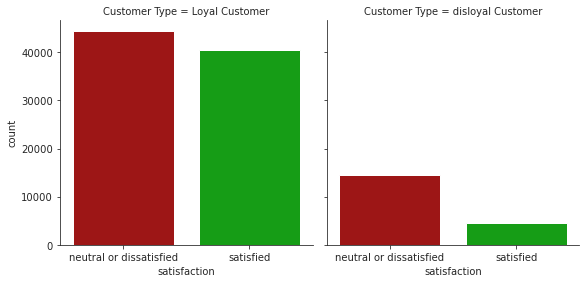

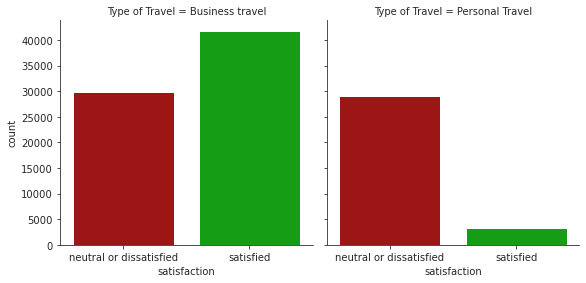

In [7]:
with sns.axes_style(style='ticks'):
    barPlot = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=data, 
        kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])  
    barPlot = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=data, 
        kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])
    barPlot = sns.catplot("satisfaction", col="Type_of_Travel", col_wrap=2, data=data, 
        kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])

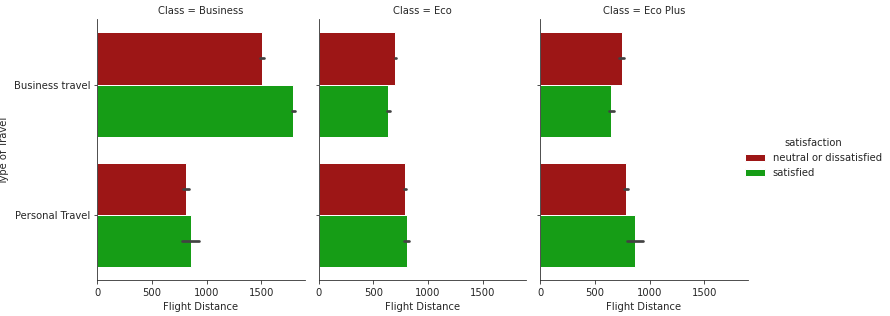

In [9]:
with sns.axes_style(style='ticks'):
    barPlot = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction",
        col="Class", data=data, kind="bar", height=4.5, aspect=.8,palette = ['#b30000','#00b300'])

In [46]:
import plotly.graph_objects as go
import numpy as np

x = data[data.satisfaction=='neutral or dissatisfied']
y = data[data.satisfaction=='satisfied']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x['Age'],name='neutral or dissatisfied',marker_color='#b30000'))
fig.add_trace(go.Histogram(x=y['Age'],name='satisfied',marker_color='#00b300'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [60]:
x = data[data.Class=='Eco Plus']
y = data[data.Class=='Eco']
z = data[data.Class=='Business']

fig = go.Figure()
fig.add_trace(go.Histogram(x=z['Flight_Distance'],name='Business',marker_color='#1154ff'))
fig.add_trace(go.Histogram(x=y['Flight_Distance'],name='Eco',marker_color='#f6b000'))
fig.add_trace(go.Histogram(x=x['Flight_Distance'],name='Eco Plus',marker_color='#67c200'))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces()
fig.show()

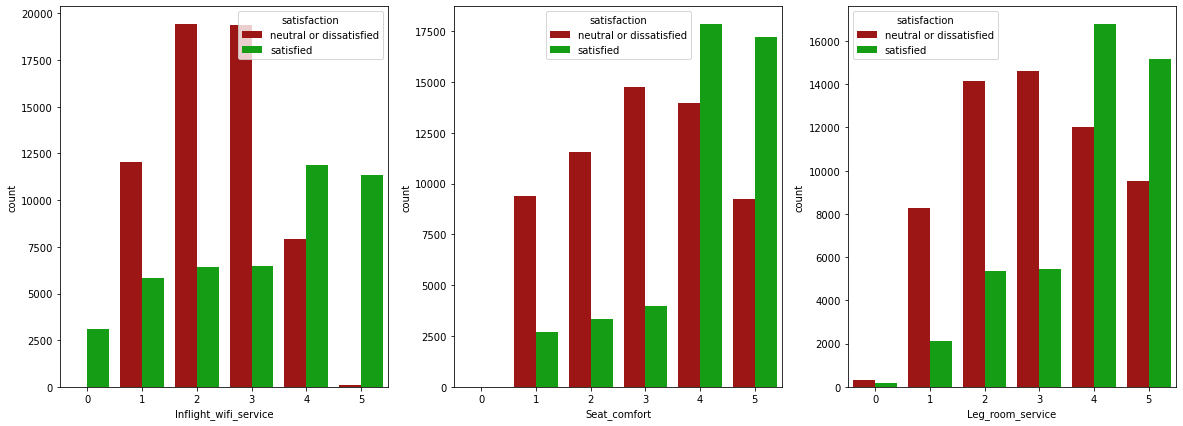

In [59]:
f, ax = plt.subplots(1, 3, figsize = (20,7))
sns.countplot(x = 'Inflight_wifi_service', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = data, ax = ax[0])
sns.countplot(x = 'Seat_comfort', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = data, ax = ax[1])
sns.countplot(x = 'Leg_room_service', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = data, ax = ax[2])
plt.show()

# OPERAZIONI SUL DATASET DI TRAINING

In [21]:
#rimuovo le colonne non importanti, secondo l'analisi 
data.drop(['Age','Gender','Gate_location'], axis=1, inplace=True)

In [22]:
data.isna().sum() #trovo i valori mancanti

Customer_Type                          0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [23]:
#sostituisco i valori mancanti nella colonna con la media dei vaolri nella colonna 
data['Arrival_Delay_in_Minutes'].fillna(data['Arrival_Delay_in_Minutes'].median(axis = 0), inplace = True)
data.isna().sum()

Customer_Type                        0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [24]:
col_numeriche = [feature for feature in data.columns if data[feature].dtype.name != 'category']
col_numeriche.remove('satisfaction')
col_categoriche = [feature for feature in data.columns if data[feature].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

print('-'*40)
print('Numero colonne categorico: ',len(col_categoriche))
print('-'*40)
print('Nomi colonne categoriche:',col_categoriche)
print(' '*40)
print('-'*40)
print('Numero colonne numeriche: ', len(col_numeriche))
print('-'*40)
print('Nomi colonne numeriche: ',col_numeriche)

----------------------------------------
Numero colonne categorico:  16
----------------------------------------
Nomi colonne categoriche: ['Customer_Type', 'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']
                                        
----------------------------------------
Numero colonne numeriche:  3
----------------------------------------
Nomi colonne numeriche:  ['Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


In [25]:
col_binarie = [columns for columns in col_categoriche if data_describe[columns]['unique'] == 2]
col_nonbinarie = [columns for columns in col_categoriche if data_describe[columns]['unique'] > 2]

print('-'*40)
print('Numero colonne binarie: ',len(col_binarie))
print('-'*40)
print('Nome colonne binarie:',col_binarie)
print(' '*40)
print('-'*40)
print('Numero colonne non binarie: ', len(col_nonbinarie))
print('-'*40)
print('Nome colonne non binarie: ',col_nonbinarie)

----------------------------------------
Numero colonne binarie:  2
----------------------------------------
Nome colonne binarie: ['Customer_Type', 'Type_of_Travel']
                                        
----------------------------------------
Numero colonne non binarie:  14
----------------------------------------
Nome colonne non binarie:  ['Class', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']


In [26]:
#trasformo le colonne binarie in buleani
for col in col_binarie:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.at[data[col] == uniq, col] = k
        k +=1 

In [27]:
#creo per ogni colonna non binaria una colonna n colonne con i sui dati binarie
df_nonbinario_train = pd.get_dummies(data[col_nonbinarie])

In [28]:
from sklearn.preprocessing import StandardScaler

#normalizzo i dati numerici presenti
SS = StandardScaler()

df_numerico_train = data[col_numeriche]

scaled_columns = SS.fit_transform(df_numerico_train)
scaled_columns = pd.DataFrame(scaled_columns)
scaled_columns.columns = ['Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

df_numerico_train = scaled_columns

In [29]:
target_train = data['satisfaction']
df_train = pd.concat((df_numerico_train, df_nonbinario_train, data[col_binarie]), axis = 1)
print(data.shape)
df_train.describe()

(103904, 20)


,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight_wifi_service_0,Inflight_wifi_service_1,Inflight_wifi_service_2,Inflight_wifi_service_3,...,Inflight_service_2,Inflight_service_3,Inflight_service_4,Inflight_service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,1.029401e-16,-1.153198e-16,-2.945899e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,0.248961,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000005e+00,1.000005e+00,1.000005e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,0.432413,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-1.161768e+00,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.776706e-01,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.474412e-01,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.551379e-01,-7.364806e-02,-5.519832e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.804423e+00,4.125438e+01,4.059206e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
target_train.replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

# OPERASZIONI SUL DATASET DI TESTING

In [35]:
data_test = airline_test

In [36]:
data_test = data_test.drop(data_test.iloc[:,[0, 1]], axis = 1) #eliminiamo le prime due colonne che non contenevano informazioni

categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data_test.iloc[:,categorical_indexes] = data_test.iloc[:,categorical_indexes].astype('category')

data_test.columns = [c.replace(' ', '_') for c in data_test.columns]
#-------------------------------------------------------------------#
data_test.drop(['Age','Gender','Gate_location'], axis=1, inplace=True)
#-------------------------------------------------------------------#
data_test['Arrival_Delay_in_Minutes'].fillna(data_test['Arrival_Delay_in_Minutes'].median(axis = 0), inplace = True)
#-------------------------------------------------------------------#
col_numeriche_test= [feature for feature in data_test.columns if data_test[feature].dtype.name != 'category']
col_numeriche_test.remove('satisfaction')
col_categoriche_test = [feature for feature in data_test.columns if data_test[feature].dtype.name == 'category']
data_describe_test = data_test.describe(include = ['category'])
#-------------------------------------------------------------------#
col_binarie_test = [columns for columns in col_categoriche_test if data_describe_test[columns]['unique'] == 2]
col_nonbinarie_test = [columns for columns in col_categoriche_test if data_describe_test[columns]['unique'] > 2]
#-------------------------------------------------------------------#
#trasformo le colonne binarie in buleani
for col in col_binarie_test:
    data_test[col] = data_test[col].astype('object')
    k = 0
    for uniq in data_test[col].unique():
        data_test.at[data_test[col] == uniq, col] = k
        k +=1 
#-------------------------------------------------------------------#
#creo per ogni colonna non binaria una colonna n colonne con i sui dati binarie
df_nonbinario_test = pd.get_dummies(data_test[col_nonbinarie_test])
#-------------------------------------------------------------------#
#normalizzo i dati numerici presenti
SS = StandardScaler()
df_numerico_test = data_test[col_numeriche_test]
scaled_columns_test = SS.fit_transform(df_numerico_test)
scaled_columns_test = pd.DataFrame(scaled_columns_test)
scaled_columns_test.columns = ['Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
df_numerico_test= scaled_columns_test
#-------------------------------------------------------------------#
target_test = data_test['satisfaction']
df_test = pd.concat((df_numerico_test, df_nonbinario_test, data_test[col_binarie_test]), axis = 1)
#-------------------------------------------------------------------#
target_test.replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
#-------------------------------------------------------------------#
df_test['Seat_comfort_0'] = 0
df_test['Checkin_service_0'] = 0

In [39]:
df_test = df_test.loc[:, ['Flight_Distance', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight_wifi_service_0', 'Inflight_wifi_service_1',
       'Inflight_wifi_service_2', 'Inflight_wifi_service_3',
       'Inflight_wifi_service_4', 'Inflight_wifi_service_5',
       'Departure/Arrival_time_convenient_0',
       'Departure/Arrival_time_convenient_1',
       'Departure/Arrival_time_convenient_2',
       'Departure/Arrival_time_convenient_3',
       'Departure/Arrival_time_convenient_4',
       'Departure/Arrival_time_convenient_5', 'Ease_of_Online_booking_0',
       'Ease_of_Online_booking_1', 'Ease_of_Online_booking_2',
       'Ease_of_Online_booking_3', 'Ease_of_Online_booking_4',
       'Ease_of_Online_booking_5', 'Food_and_drink_0', 'Food_and_drink_1',
       'Food_and_drink_2', 'Food_and_drink_3', 'Food_and_drink_4',
       'Food_and_drink_5', 'Online_boarding_0', 'Online_boarding_1',
       'Online_boarding_2', 'Online_boarding_3', 'Online_boarding_4',
       'Online_boarding_5', 'Seat_comfort_0', 'Seat_comfort_1',
       'Seat_comfort_2', 'Seat_comfort_3', 'Seat_comfort_4', 'Seat_comfort_5',
       'Inflight_entertainment_0', 'Inflight_entertainment_1',
       'Inflight_entertainment_2', 'Inflight_entertainment_3',
       'Inflight_entertainment_4', 'Inflight_entertainment_5',
       'On-board_service_0', 'On-board_service_1', 'On-board_service_2',
       'On-board_service_3', 'On-board_service_4', 'On-board_service_5',
       'Leg_room_service_0', 'Leg_room_service_1', 'Leg_room_service_2',
       'Leg_room_service_3', 'Leg_room_service_4', 'Leg_room_service_5',
       'Baggage_handling_1', 'Baggage_handling_2', 'Baggage_handling_3',
       'Baggage_handling_4', 'Baggage_handling_5', 'Checkin_service_0',
       'Checkin_service_1', 'Checkin_service_2', 'Checkin_service_3',
       'Checkin_service_4', 'Checkin_service_5', 'Inflight_service_0',
       'Inflight_service_1', 'Inflight_service_2', 'Inflight_service_3',
       'Inflight_service_4', 'Inflight_service_5', 'Cleanliness_0',
       'Cleanliness_1', 'Cleanliness_2', 'Cleanliness_3', 'Cleanliness_4',
       'Cleanliness_5', 'Customer_Type', 'Type_of_Travel']]

# MODELLI

In [42]:
X_train = df_train
y_train = target_train
X_test = df_test
y_test = target_test

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 

/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy = 0.7217431475207884
ROC Area under Curve = 0.7021801817145359
              precision    recall  f1-score   support

           0    0.70640   0.86249   0.77668     14573
           1    0.75510   0.54187   0.63096     11403

    accuracy                        0.72174     25976
   macro avg    0.73075   0.70218   0.70382     25976
weighted avg    0.72778   0.72174   0.71271     25976



/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


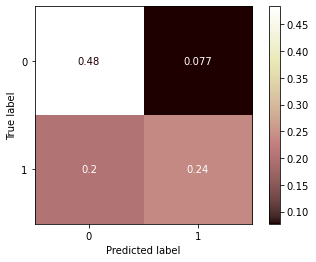

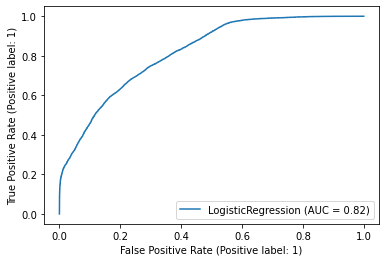

In [47]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

log = LogisticRegression(**params_lr)


log.fit(X_train,y_train.ravel())
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 


print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(log, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(log, X_test, y_test) 

pass

Accuracy = 0.8642593162919618
ROC Area under Curve = 0.8625505781015118
              precision    recall  f1-score   support

           0    0.88090   0.87655   0.87872     14573
           1    0.84322   0.84855   0.84588     11403

    accuracy                        0.86426     25976
   macro avg    0.86206   0.86255   0.86230     25976
weighted avg    0.86436   0.86426   0.86430     25976



/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


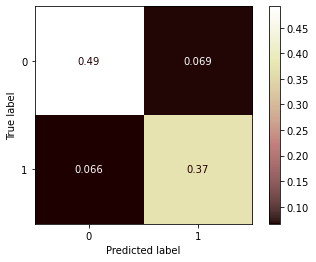

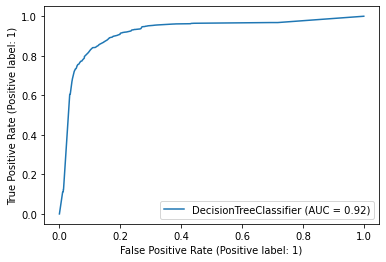

In [58]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}


clf = DecisionTreeClassifier(**params_dt)


clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
#time_taken = time.time()-t0

print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(clf, X_test, y_test) 

pass